In [1]:
import os

nexra_data_dir = "../../../nexra_data/2020010100"
os.listdir(nexra_data_dir)

['ss_ps.ctl',
 'ss_q2m.grd',
 'ss_cld_frac.grd',
 'ss_vap_atm.grd',
 'sa_swu_sfc.grd',
 'sa_tppn.grd',
 'sa_lwu_toa.ctl',
 'sa_swd_sfc.ctl',
 'ss_u10m.grd',
 'ss_v10m.ctl',
 'ss_slp.grd',
 'ss_t2m.grd',
 'sa_snfl.grd',
 'sa_swu_sfc.ctl',
 'ss_vap_atm.ctl',
 'ss_ps.grd',
 'ss_cld_frac.ctl',
 'ss_q2m.ctl',
 'sa_lwu_toa.grd',
 'sa_tppn.ctl',
 'ss_u10m.ctl',
 'sa_swd_sfc.grd',
 'ss_v10m.grd',
 'ss_t2m.ctl',
 'ss_slp.ctl',
 'sa_snfl.ctl']

In [2]:
import numpy as np

data = np.fromfile(nexra_data_dir+"/ss_ps.grd", dtype=">f")

In [3]:
data

array([69265.46 , 69251.7  , 69237.72 , ..., 99745.68 , 99743.8  ,
       99741.945], dtype=float32)

In [4]:
len(data)

6144000

In [5]:
data.shape

(6144000,)

In [6]:
grid_data_number_of_earth = 357 ** 2
grid_data_number_of_earth

127449

In [7]:
data_count_per_file = 5 * 24 * grid_data_number_of_earth

In [8]:
with open(nexra_data_dir+"/ss_ps.ctl", "rb") as f:
    f = f.read()

decoded_data = f.decode("ascii")
print(type(decoded_data), decoded_data)

<class 'str'> DSET ^ss_ps.grd
TITLE NICAM data output
OPTIONS BIG_ENDIAN 
UNDEF -0.99900E+35
XDEF   320 LEVELS
    0.5625    1.6875    2.8125    3.9375    5.0625    6.1875    7.3125    8.4375    9.5625   10.6875
   11.8125   12.9375   14.0625   15.1875   16.3125   17.4375   18.5625   19.6875   20.8125   21.9375
   23.0625   24.1875   25.3125   26.4375   27.5625   28.6875   29.8125   30.9375   32.0625   33.1875
   34.3125   35.4375   36.5625   37.6875   38.8125   39.9375   41.0625   42.1875   43.3125   44.4375
   45.5625   46.6875   47.8125   48.9375   50.0625   51.1875   52.3125   53.4375   54.5625   55.6875
   56.8125   57.9375   59.0625   60.1875   61.3125   62.4375   63.5625   64.6875   65.8125   66.9375
   68.0625   69.1875   70.3125   71.4375   72.5625   73.6875   74.8125   75.9375   77.0625   78.1875
   79.3125   80.4375   81.5625   82.6875   83.8125   84.9375   86.0625   87.1875   88.3125   89.4375
   90.5625   91.6875   92.8125   93.9375   95.0625   96.1875   97.3125   98.4375 

In [9]:
import re

splitted_by_space = re.split("\s", decoded_data)
splitted_by_space

['DSET',
 '^ss_ps.grd',
 'TITLE',
 'NICAM',
 'data',
 'output',
 'OPTIONS',
 'BIG_ENDIAN',
 '',
 'UNDEF',
 '-0.99900E+35',
 'XDEF',
 '',
 '',
 '320',
 'LEVELS',
 '',
 '',
 '',
 '',
 '0.5625',
 '',
 '',
 '',
 '1.6875',
 '',
 '',
 '',
 '2.8125',
 '',
 '',
 '',
 '3.9375',
 '',
 '',
 '',
 '5.0625',
 '',
 '',
 '',
 '6.1875',
 '',
 '',
 '',
 '7.3125',
 '',
 '',
 '',
 '8.4375',
 '',
 '',
 '',
 '9.5625',
 '',
 '',
 '10.6875',
 '',
 '',
 '',
 '11.8125',
 '',
 '',
 '12.9375',
 '',
 '',
 '14.0625',
 '',
 '',
 '15.1875',
 '',
 '',
 '16.3125',
 '',
 '',
 '17.4375',
 '',
 '',
 '18.5625',
 '',
 '',
 '19.6875',
 '',
 '',
 '20.8125',
 '',
 '',
 '21.9375',
 '',
 '',
 '',
 '23.0625',
 '',
 '',
 '24.1875',
 '',
 '',
 '25.3125',
 '',
 '',
 '26.4375',
 '',
 '',
 '27.5625',
 '',
 '',
 '28.6875',
 '',
 '',
 '29.8125',
 '',
 '',
 '30.9375',
 '',
 '',
 '32.0625',
 '',
 '',
 '33.1875',
 '',
 '',
 '',
 '34.3125',
 '',
 '',
 '35.4375',
 '',
 '',
 '36.5625',
 '',
 '',
 '37.6875',
 '',
 '',
 '38.8125',
 '',
 '',
 '3

In [10]:
import re

is_xdef = False
longitudes = []
x_size = None
is_ydef = False
latitudes = []
y_size = None

float_pattern = "[-+]?[0-9]+[\.][0-9]+"
positive_int_pattern = "[0-9]{3}"
float_prog = re.compile(float_pattern)
positive_int_prog = re.compile(positive_int_pattern)

for i in splitted_by_space:
    if "XDEF" == i:
        is_ydef = False
        is_xdef = True

    if "YDEF" == i:
        is_xdef = False
        is_ydef = True

    macth_positive_int = positive_int_prog.match(i)
    match_float = float_prog.match(i)

    if x_size is None and is_xdef is True and macth_positive_int is not None:
        x_size = int(macth_positive_int.group(0))
    
    if is_xdef is True and match_float is not None:
        longitudes.append(float(match_float.group(0)))

    if y_size is None and is_ydef is True and macth_positive_int is not None:
        y_size = int(macth_positive_int.group(0))

    if is_ydef is True and float_prog.match(i) is not None:
        latitudes.append(float(match_float.group(0)))
    
        

In [11]:
print(x_size)
print(len(longitudes), longitudes)
print(y_size)
print(len(latitudes), latitudes)

320
320 [0.5625, 1.6875, 2.8125, 3.9375, 5.0625, 6.1875, 7.3125, 8.4375, 9.5625, 10.6875, 11.8125, 12.9375, 14.0625, 15.1875, 16.3125, 17.4375, 18.5625, 19.6875, 20.8125, 21.9375, 23.0625, 24.1875, 25.3125, 26.4375, 27.5625, 28.6875, 29.8125, 30.9375, 32.0625, 33.1875, 34.3125, 35.4375, 36.5625, 37.6875, 38.8125, 39.9375, 41.0625, 42.1875, 43.3125, 44.4375, 45.5625, 46.6875, 47.8125, 48.9375, 50.0625, 51.1875, 52.3125, 53.4375, 54.5625, 55.6875, 56.8125, 57.9375, 59.0625, 60.1875, 61.3125, 62.4375, 63.5625, 64.6875, 65.8125, 66.9375, 68.0625, 69.1875, 70.3125, 71.4375, 72.5625, 73.6875, 74.8125, 75.9375, 77.0625, 78.1875, 79.3125, 80.4375, 81.5625, 82.6875, 83.8125, 84.9375, 86.0625, 87.1875, 88.3125, 89.4375, 90.5625, 91.6875, 92.8125, 93.9375, 95.0625, 96.1875, 97.3125, 98.4375, 99.5625, 100.6875, 101.8125, 102.9375, 104.0625, 105.1875, 106.3125, 107.4375, 108.5625, 109.6875, 110.8125, 111.9375, 113.0625, 114.1875, 115.3125, 116.4375, 117.5625, 118.6875, 119.8125, 120.9375, 122.0625,

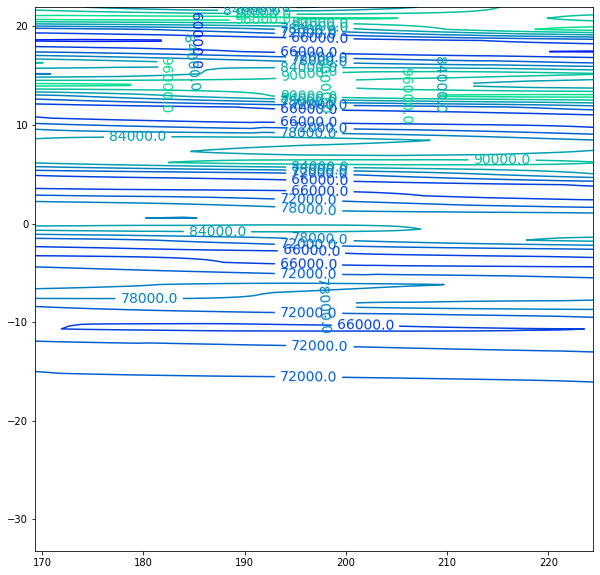

In [12]:
import matplotlib.pyplot as plt

x, y = np.meshgrid(longitudes[150:200], latitudes[50:100])
z = data[:len(longitudes[150:200])*len(latitudes[50:100])].reshape((len(latitudes[50:100]), len(longitudes[150:200])))

fig, ax = plt.subplots(figsize=(10, 10))
cont = ax.contour(x, y, z, cmap="winter")
cont.clabel(fmt='%3.1f', fontsize=14)
plt.show()
plt.close()

In [17]:
import pandas as pd

df = pd.read_parquet("/Users/akiranoda/Desktop/test/2020/20200818/18_Cumulative_water_vapor_amount.parquet.gzip", engine="pyarrow")
df.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,0.152389,0.152249,0.152106,0.151960,0.151812,0.151662,0.151510,0.151356,0.151199,0.151041,...,0.153650,0.153536,0.153420,0.153301,0.153179,0.153054,0.152926,0.152796,0.152663,0.152527
-88.3125,0.164830,0.164098,0.163408,0.162872,0.162330,0.161784,0.161233,0.160679,0.160120,0.159558,...,0.171310,0.170721,0.170121,0.169511,0.168890,0.168258,0.167617,0.166965,0.166269,0.165554
-87.1875,0.176776,0.175561,0.174339,0.173110,0.171874,0.170688,0.169584,0.168472,0.167353,0.166227,...,0.191396,0.189621,0.187822,0.185998,0.184152,0.182717,0.181548,0.180368,0.179180,0.177982
-86.0625,0.188971,0.186768,0.184547,0.182308,0.180051,0.177779,0.175725,0.174190,0.172649,0.171247,...,0.212999,0.209194,0.206594,0.203973,0.201743,0.199671,0.197575,0.195457,0.193316,0.191153
-84.9375,0.202375,0.198786,0.196596,0.194383,0.192147,0.189889,0.187609,0.185310,0.182990,0.180652,...,0.246552,0.242199,0.237794,0.233337,0.228830,0.224275,0.219673,0.215027,0.210338,0.206291


In [14]:
z

array([[69265.46 , 69251.7  , 69237.72 , ..., 68502.51 , 68486.64 ,
        68470.85 ],
       [68455.14 , 68439.516, 68423.98 , ..., 67899.96 , 67890.4  ,
        67881.14 ],
       [67872.19 , 67863.55 , 67855.21 , ..., 67832.61 , 67840.01 ,
        67847.73 ],
       ...,
       [68996.945, 69296.45 , 69596.27 , ..., 97622.53 , 98112.22 ,
        98591.04 ],
       [98996.8  , 99329.35 , 99628.305, ..., 88727.67 , 88087.01 ,
        87448.74 ],
       [86813.12 , 86180.37 , 85538.984, ..., 94612.54 , 95114.33 ,
        95608.445]], dtype=float32)